**Unstructured Data Analytics: Group Assignment #2**

# Group Members:
1. Rithu Anand Krishnan
2. Manvi Mahajan
3. Paul Wen (Yilin Wen)
4. Alex Yu
5. Judy Chen (Yu-Ting Chen)

In [1]:
## Imports
import pandas as pd
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Task A: 

Read in scraped data and replace top 5 biggest cities in PA with "big city" and concatenate to tweet

In [3]:
#Created dataframe from scraped tweets
df = pd.read_csv("tweetsv3.csv", names=["username", "location", "text"])

In [4]:
#Remove all na's
df = df.fillna('NA')
df

,username,location,text
NaN,username,location,text
0.0,AlbertVinh,NA,@JohnFetterman Let's send @DrOz to be our 51st...
1.0,sdmikef,"Right here, right now ...",@DashaBurns @NBCNightlyNews @TODAYshow @NBCNew...
2.0,AlbertVinh,NA,@DrOz Let's send @DrOz to be our 51st Vote in ...
3.0,TheWuhanClan,Fallout Shelter,John Fetterman is a vegetable and not fit for ...
...,...,...,...
5996.0,OnTaskDemocrat,"Pennsylvania, USA",John Fetterman has won the hearts of #philly t...
5997.0,rbgslegacy,🇺🇸,Attn: John Fetterman #FettermanForSenate #Fett...
5998.0,razingarizona,"Tamir factory, Arizona",@lackboys3 Similar story with John Fetterman i...
5999.0,brendankihn,"Washington, DC",Iconic shade #PaSen #2022Elections https://t.c...


In [5]:
#Categorize tweets from top 5 biggest cities in PA, small towns in PA, and not from PA

#Top 5 cities PA tweets
top_5 = ['phil', 'pitts', 'allentown', 'erie', 'reading']

for n in top_5:
    df.loc[df['location'].str.contains(n, case=False), 'text'] = 'big_city_pa ' + df['text']
    df.loc[df['location'].str.contains(n, case=False), 'location'] = n

#Small towns in PA
df.loc[df['location'].str.contains("PA|Penns", case=False), 'text'] = 'small_town_pa ' + df['text']

#Not in PA Tweets
df.loc[~df['text'].str.contains("big_city_pa|small_town_pa", case=False), 'text'] = 'non_PA ' + df['text']


In [6]:
df.head(40)

,username,location,text
NaN,username,location,non_PA text
0.0,AlbertVinh,NA,non_PA @JohnFetterman Let's send @DrOz to be o...
1.0,sdmikef,"Right here, right now ...",non_PA @DashaBurns @NBCNightlyNews @TODAYshow ...
2.0,AlbertVinh,NA,non_PA @DrOz Let's send @DrOz to be our 51st V...
3.0,TheWuhanClan,Fallout Shelter,non_PA John Fetterman is a vegetable and not f...
4.0,AureliusStoic1,"Pennsylvania, USA","small_town_pa You feel for this man, personall..."
5.0,Dsquared75,Arlington VA,non_PA #PASen https://t.co/Mtfp7rDr39
6.0,lxeagle17,"Berkeley, CA",non_PA I don't know what's going to happen in ...
7.0,RussOnPolitics,"New York, NY/Cruise Ship",non_PA This reporter is deservedly getting dra...
8.0,TooHungry2Fxn,"Los Angeles, CA","non_PA sam, you’re not a doctor. please explai..."


## Task B: 

Find 4 key issues mentioned by the public in the tweets

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
import numpy as np

#Tokenize texts in tweets
df['text'] = df['text'].astype(str)
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].str.lower()

#Replace names with Fetterman and Oz
oz = ["droz", "dr.oz","mehmet", "dr.oz","oz's", "oz's"]
fetterman = ["johnfetterman", "john fetterman", "john", "fettermanforsenate", "teamfetterman", "fettermanisthebetterman"]

for n in oz:
    df['text']=df['text'].str.replace(n,"oz")

for n in fetterman:
    df['text']=df['text'].str.replace(n,"fetterman")

df['text_tokens'] = df['text'].apply(lambda x: tokenizer.tokenize(x))

#Remove stopwords
stop_words = set(stopwords.words('english'))
df['text_tokens'] = df['text_tokens'].apply(lambda x: [i for i in x if not i in stop_words])
df['text_tokens'].to_csv('out.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


In [8]:
#Find frequency distribution
all_words = df['text_tokens'].sum()
freq_all_words = nltk.FreqDist(all_words)

#Find top 50 words
top_50 = freq_all_words.most_common(50)
top_50

[('pasen', 6020),
 ('co', 5624),
 ('https', 5599),
 ('non_pa', 4489),
 ('fetterman', 3865),
 ('oz', 3644),
 ('small_town_pa', 1262),
 ('pennsylvania', 896),
 ('pa', 662),
 ('senate', 646),
 ('new', 638),
 ('amp', 571),
 ('campaign', 483),
 ('pagov', 483),
 ('dr', 446),
 ('pasenate', 394),
 ('vote', 328),
 ('race', 309),
 ('like', 304),
 ('gasen', 299),
 ('voters', 289),
 ('one', 277),
 ('papol', 277),
 ('gop', 277),
 ('gt', 270),
 ('ohsen', 267),
 ('candidate', 264),
 ('azsen', 257),
 ('jersey', 256),
 ('big_city_pa', 251),
 ('1', 246),
 ('wisen', 231),
 ('r', 229),
 ('would', 222),
 ('trump', 221),
 ('2', 216),
 ('election', 209),
 ('debate', 205),
 ('people', 205),
 ('3', 204),
 ('poll', 202),
 ('crime', 191),
 ('fec', 190),
 ('senator', 188),
 ('get', 172),
 ('f24', 172),
 ('state', 171),
 ('know', 171),
 ('biden', 169),
 ('us', 169)]

In [9]:
#Top 4 issues
top_4_issues = ['crime', 'abortion', 'tax', 'foreign']

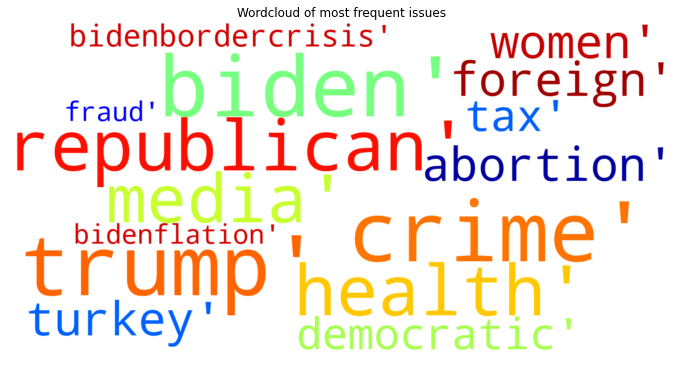

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

top_15_words = [('trump', 210), ('biden', 152), ('crime', 152), ('republican', 138), ('health', 118), ('media', 116), ('abortion', 113), ('women', 111), ('foreign', 91), ('turkey', 81),  ('democratic', 80), ('tax', 76), ('bidenbordercrisis', 59), ('bidenflation', 52), ('fraud', 52)]

#Function to generate wordcloud of most frequent issues
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    AllWords = ''.join(''.join([str(l) for l in wd_list]))
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(AllWords)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.title('Wordcloud of most frequent issues')
    plt.imshow(wordcloud, interpolation="bilinear");

word_cloud(top_15_words)

## Task D: 

Perform lift and sentiment analysis on each candidate and issue:

In [11]:
lift_row = ["oz","fetterman",'crime', 'abortion', 'health', 'foreign','tax']

# Calculate Lift value
def calculate_lift(a, b, tokenized_posts):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(tokenized_posts)
    if a==b:
        return 1
    for i in tokenized_posts:
        if a in i:
            num_a += 1
        if b in i:
            num_b += 1
        if a in i and b in i:
            num_a_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)

# Lift: Issues and candidates
lift_candidates = pd.DataFrame(columns = ['candidate','issues','lift'])
i=0
for  candidate in lift_row:
    for issue in lift_row:
        temp_lift=calculate_lift(str(candidate), str(issue), df.text_tokens)
        lift_candidates.loc[i]=[str(candidate),str(issue),temp_lift]
        i=i+1
        
df_lift = lift_candidates.sort_values('lift',ascending = False).groupby('candidate').head(10)

# Print the lift matrix
lift_matrix2 = df_lift.pivot(index='candidate', columns='issues')
lift_matrix2

lift                                                    \
issues     abortion     crime fetterman   foreign    health        oz   
candidate                                                               
abortion          1  1.304216  0.807154       0.0  3.784363  1.589418   
crime      1.304216         1  1.211998       0.0  0.833843  0.749747   
fetterman  0.807154  1.211998         1   0.38863    1.6246  1.003081   
foreign         0.0       0.0   0.38863         1       0.0  2.172951   
health     3.784363  0.833843    1.6246       0.0         1  1.297664   
oz         1.589418  0.749747  1.003081  2.172951  1.297664         1   
tax             0.0  0.982887  0.540702       0.0       0.0    1.3834   

                     
issues          tax  
candidate            
abortion        0.0  
crime      0.982887  
fetterman  0.540702  
foreign         0.0  
health          0.0  
oz           1.3834  
tax               1

In [12]:
#Printing lift values
print("Lift between abortion and Oz: %.4f"% lift_matrix2.iloc[0,5])
print("Lift between crime and Oz: %.4f"% lift_matrix2.iloc[1,5])
print("Lift between foreign and Oz: %.4f"% lift_matrix2.iloc[3,5])
print("Lift between tax and Oz: %.4f"% lift_matrix2.iloc[6,5])
print("Lift between abortion and Fetterman: %.4f"% lift_matrix2.iloc[0,2])
print("Lift between crime and Fetterman: %.4f"% lift_matrix2.iloc[1,2])
print("Lift between foreign and Fetterman: %.4f"% lift_matrix2.iloc[3,2])
print("Lift between tax and Fetterman: %.4f"% lift_matrix2.iloc[6,2])

Lift between abortion and Oz: 1.5894
Lift between crime and Oz: 0.7497
Lift between foreign and Oz: 2.1730
Lift between tax and Oz: 1.3834
Lift between abortion and Fetterman: 0.8072
Lift between crime and Fetterman: 1.2120
Lift between foreign and Fetterman: 0.3886
Lift between tax and Fetterman: 0.5407


## Sentiment Analysis: 


In [13]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [14]:
df['scores'] = df['text'].apply(lambda text: analyser.polarity_scores(text))

In [15]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [16]:
#Function to categorize the compound value as positive, negative, or neutral
def senti(df):
    if df['compound'] >= 0.05:
        val = "Positive"
    elif df['compound'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

#Calling function  
df['Comp_score'] = df.apply(senti, axis=1)

In [17]:
df

,username,location,text,text_tokens,scores,compound,Comp_score
NaN,username,location,non_pa text,"[non_pa, text]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
0.0,AlbertVinh,NA,non_pa @fetterman let's send @oz to be our 51s...,"[non_pa, fetterman, let, send, oz, 51st, vote,...","{'neg': 0.061, 'neu': 0.81, 'pos': 0.128, 'com...",0.5255,Positive
1.0,sdmikef,"Right here, right now ...",non_pa @dashaburns @nbcnightlynews @todayshow ...,"[non_pa, dashaburns, nbcnightlynews, todayshow...","{'neg': 0.072, 'neu': 0.81, 'pos': 0.118, 'com...",0.1779,Positive
2.0,AlbertVinh,NA,non_pa @oz let's send @oz to be our 51st vote ...,"[non_pa, oz, let, send, oz, 51st, vote, u, sen...","{'neg': 0.061, 'neu': 0.81, 'pos': 0.128, 'com...",0.5255,Positive
3.0,TheWuhanClan,Fallout Shelter,non_pa fetterman is a vegetable and not fit fo...,"[non_pa, fetterman, vegetable, fit, office, pa...","{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",-0.2755,Negative
...,...,...,...,...,...,...,...
5996.0,OnTaskDemocrat,"Pennsylvania, USA",small_town_pa fetterman has won the hearts of ...,"[small_town_pa, fetterman, hearts, philly, way...","{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...",0.8402,Positive
5997.0,rbgslegacy,🇺🇸,non_pa attn: fetterman #fetterman #fetterman #...,"[non_pa, attn, fetterman, fetterman, fetterman...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
5998.0,razingarizona,"Tamir factory, Arizona",non_pa @lackboys3 similar story with fetterman...,"[non_pa, lackboys3, similar, story, fetterman,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
5999.0,brendankihn,"Washington, DC",non_pa iconic shade #pasen #2022elections http...,"[non_pa, iconic, shade, pasen, 2022elections, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [18]:
#Function to implement sentiment analysis by running loop through text token column and looking for issue and candidate using the window=10 function
def sentimentIssue(df,issue, candidate, window):
    scores=[]
    for i in df["text_tokens"]:
        if ((issue in i) and (candidate in i)):
            a = ' '.join(e for e in i[i.index(issue)-window:i.index(issue)+window])
            if a != "":
                sentiment_score = analyser.polarity_scores(a)['compound']
                scores.append(sentiment_score)
    return np.mean(scores)

In [19]:
#Printing sentiment values
print("Sentiment between abortion and Oz is negative and the sentiment score is %.4f"% sentimentIssue(df,"abortion", "oz", window=10))
print("Sentiment between crime and Oz is negative and the sentiment score is %.4f"% sentimentIssue(df,"crime", "oz", window=10))
print("Sentiment between tax and Oz is neutral and the sentiment score is %.4f"% sentimentIssue(df,"tax", "oz", window=10))
print("Sentiment between foreign and Oz is positive and the sentiment score is %.4f"% sentimentIssue(df,"foreign", "oz", window=10))
print("Sentiment between abortion and Fetterman is negative and the sentiment score is %.4f"% sentimentIssue(df,"abortion", "fetterman", window=10))
print("Sentiment between crime and Fetterman is negative and the sentiment score is %.4f"% sentimentIssue(df,"crime", "fetterman", window=10))
print("Sentiment between tax and Fetterman is neutral and the sentiment score is %.4f"% sentimentIssue(df,"tax", "fetterman", window=10))
print("Sentiment between foreign and Fetterman is positive and the sentiment score is %.4f"% sentimentIssue(df,"foreign", "fetterman", window=10))

Sentiment between abortion and Oz is negative and the sentiment score is -0.2314
Sentiment between crime and Oz is negative and the sentiment score is -0.4299
Sentiment between tax and Oz is neutral and the sentiment score is 0.0549
Sentiment between foreign and Oz is positive and the sentiment score is 0.3932
Sentiment between abortion and Fetterman is negative and the sentiment score is -0.0943
Sentiment between crime and Fetterman is negative and the sentiment score is -0.3779
Sentiment between tax and Fetterman is neutral and the sentiment score is -0.0507
Sentiment between foreign and Fetterman is positive and the sentiment score is 0.4577


## Task E: 

Show the attributes and candidates on an MDS plot (Using mds.py script).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


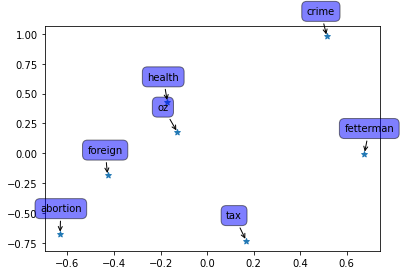

In [20]:
## Calculating the dissimilarity matrix which is the input for plotting MDS plot
lift_matrix2 = lift_matrix2.replace(to_replace = 0.0, value = 1)
# lift_matrix2
dissimilarity_matrix = 1/lift_matrix2
np.fill_diagonal(dissimilarity_matrix.values, 0)

# dissimilarity_matrix

## Plotting MDS plot
from sklearn import manifold
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = '*'
    )
for label, x, y in zip(lift_row, coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points',ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [21]:
lift_row_town = ["oz","fetterman", "small_town_pa", "big_city_pa"]

# Calculate Lift value
def calculate_lift(a, b, tokenized_posts):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(tokenized_posts)
    if a==b:
        return 1
    for i in tokenized_posts:
        if a in i:
            num_a += 1
        if b in i:
            num_b += 1
        if a in i and b in i:
            num_a_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)

# Lift: issues and candidates
lift_candidates = pd.DataFrame(columns = ['candidate','issues','lift'])
i=0
for  candidate in lift_row_town:
    for issue in lift_row_town:
        temp_lift=calculate_lift(str(candidate), str(issue), df.text_tokens)
        lift_candidates.loc[i]=[str(candidate),str(issue),temp_lift]
        i=i+1
        
df_lift = lift_candidates.sort_values('lift',ascending = False).groupby('candidate').head(10)

# Print the lift matrix
lift_matrix2 = df_lift.pivot(index='candidate', columns='issues')
lift_matrix2

lift                                  
issues        big_city_pa fetterman        oz small_town_pa
candidate                                                  
big_city_pa             1  1.021895  1.382056           0.0
fetterman        1.021895         1  1.003081      1.236102
oz               1.382056  1.003081         1      0.981444
small_town_pa         0.0  1.236102  0.981444             1

In [22]:
#Printing lift values
print("Lift between big cities and Oz: %.4f"% lift_matrix2.iloc[0,2])
print("Lift between small towns and Oz: %.4f"% lift_matrix2.iloc[3,2])
print("Lift between big cities and Fetterman: %.4f"% lift_matrix2.iloc[0,1])
print("Lift between small towns and Fetterman: %.4f"% lift_matrix2.iloc[3,1])

Lift between big cities and Oz: 1.3821
Lift between small towns and Oz: 0.9814
Lift between big cities and Fetterman: 1.0219
Lift between small towns and Fetterman: 1.2361


In [23]:
print("Sentiment between big cities and Oz is slightly negative and the sentiment score is %.4f"% sentimentIssue(df,"big_city_pa", "oz", window=20))
print("Sentiment between big cities and Fetterman is neutral and the sentiment score is %.4f"% sentimentIssue(df,"big_city_pa", "fetterman", window=20))
print("Sentiment between small towns and Oz is neutral and the sentiment score is %.4f"% sentimentIssue(df,"small_town_pa", "oz", window=20))
print("Sentiment between small towns and Fetterman is positive and the sentiment score is %.4f"% sentimentIssue(df,"small_town_pa", "fetterman", window=20))

Sentiment between big cities and Oz is slightly negative and the sentiment score is -0.0004
Sentiment between big cities and Fetterman is neutral and the sentiment score is 0.0491
Sentiment between small towns and Oz is neutral and the sentiment score is 0.0495
Sentiment between small towns and Fetterman is positive and the sentiment score is 0.1012


## Task G: 

What advice would you give to each of the two candidates based on your analyses in D and F above?

**According to the lift and sentiment analysis between the candidates and issues:**

High lift value of **2.1730** between Oz and foreign. This is due to people bringing up his Turkish descent even though he was born in America and concerns that he may have foreign ties to Turkey. This is compounded by the fact that Oz has kept his Turkish citizenship. A common defence of Oz supporters is that this does not pose a security threat and will not impede his duties. Oz has made promises to cut ties with foreign powers and reject his Turkish citizenship if he is elected. This came after his citizenship became an issue in his campaign. However, the sentiment is positive at **0.3932**.

There is a high lift value of **1.5894** between abortion and Oz. This is because abortion is one of the main issues of this race. Fetterman supports women's rights to abortion, while Oz does not support criminalizing abortion now. His stance has shifted from categorizing abortion at any stage as murder. Twitter is mainly left-leaning and attacked Fetterman, as indicated by the negative sentiment score of **-0.2314** between Oz and abortion, and this has caused Oz to shift his stance on abortion to a milder view.

High lift value of **1.3934** between Oz and tax. This is due to his opposing the current tax bill, which supports the middle class and instead opting for tax breaks for the rich, including himself. Ordinary people are usually against tax breaks for the rich as it is seen as greedy. The sentiment does not entirely reflect this, which may be due to the small sample size.

High lift value of **1.212** between crime and Fetterman. This is because his crime policies are one of the main issues he is running on. Fetterman served on Pennsylvania's Board of Pardons as chairman. He supports amnesty for some second-degree murderers. He has come under fire for defending murderers and freeing murderers. This is supported by the negative sentiment value of **-0.3779**.

**According to the lift and sentiment analysis between the candidates and big cities and small towns:**

High lift value of **1.3821** between Oz and big cities, but the sentiment is neutral.
High lift value of **1.2361** between Fetterman and small cities, but the sentiment is positive.

**Advice**

Oz should ignore challenges to his foreign ties as his sentiment value is positive, and there is no need to defend his relationship as he has pledged to cut ties already. He should attempt to appear genuine in his stance on women's rights as it is negative or give up on the issue since Fetterman is likely to win more votes in the category. Oz's stance on tax policies is not popular with the ordinary people, and he should run on a policy more favourable for the common people to gain more support. He should also either focus more on big cities to solidify his popularity there, as indicated by his high lift value with big cities of **1.3821** or if he is confident in his favour there, he can look to compete with Fetterman in small towns.

Fetterman should portray his stance on crime more appealingly to the public as his lift value is high, but his sentiment value is negative. He appears to go easy on criminals and gives people that the public views as irredeemable second chances. He seems to be popular in small cities with a high lift value and sentiment value, so he should clean up his stance on crime and focus on campaigning in small towns unless he is confident in his support in those areas due to his positive sentiment there and instead fight Oz in the big cities.


